In [1]:
import pandas as pd
pd.__version__

'1.4.4'

In [2]:
df = pd.read_csv(r'C:\Users\justb\Downloads\Student_Perfom\exams.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


Checking for null values. None found.

In [4]:
print(df.describe())

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.000000      27.000000      23.000000
25%      56.000000      60.000000      58.000000
50%      66.500000      70.000000      68.000000
75%      77.000000      79.000000      79.000000
max     100.000000     100.000000     100.000000


Checked for any outliers. None found.

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [6]:
del df["math score"]
del df["race/ethnicity"]

Removes "math score" and "race/ethnicity" columns because the math scores are irrelevant to our project focus and the race/ethnicity of students were made anonymous.

In [7]:
df

,gender,parental level of education,lunch,test preparation course,reading score,writing score
0,male,high school,standard,completed,67,63
1,female,some high school,free/reduced,none,59,55
2,male,some college,free/reduced,none,60,50
3,male,high school,standard,none,78,68
4,male,associate's degree,standard,completed,73,68
...,...,...,...,...,...,...
995,male,high school,standard,none,70,65
996,male,associate's degree,free/reduced,completed,91,92
997,female,some high school,free/reduced,none,35,41
998,female,some college,standard,none,74,82


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Import necessary analysis tools.

In [9]:
df['parental level of education'] = df['parental level of education'].factorize()[0]

- Turns "high school" to 0
- Turns "some high school" to 1
- Turns "some college" to 2
- Turns "associate's degree" to 3
- Turns "bachelor's degree" to 4
- Turns "master's degree" to 5

In [10]:
df

,gender,parental level of education,lunch,test preparation course,reading score,writing score
0,male,0,standard,completed,67,63
1,female,1,free/reduced,none,59,55
2,male,2,free/reduced,none,60,50
3,male,0,standard,none,78,68
4,male,3,standard,completed,73,68
...,...,...,...,...,...,...
995,male,0,standard,none,70,65
996,male,3,free/reduced,completed,91,92
997,female,1,free/reduced,none,35,41
998,female,2,standard,none,74,82


C:\Users\justb\anaconda3\envs\H-CD-class\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


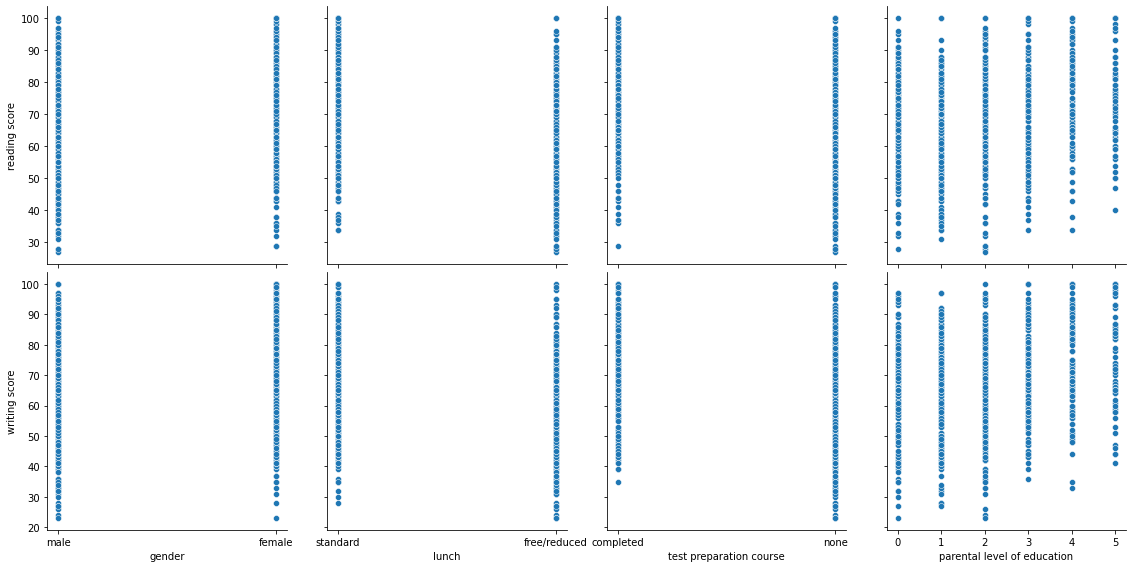

In [11]:
sns.pairplot(df, x_vars=['gender', 'lunch','test preparation\
 course', 'parental level of education'], y_vars=['reading score', 'writing score'], size=4, aspect=1, kind='scatter')
plt.show()

Plots of features. Y-axes are writing and reading scores, and the x-axes contain gender, lunch, test prep, and parental level of education.

In [12]:
df['gender'] = df['gender'].factorize()[0]

df['lunch'] = df['lunch'].factorize()[0]

df['test preparation course'] = df['test preparation course'].factorize()[0]

- Turns "male" values to 0
- Turns "female" values to 1
---
- "standard" values to 0
- "free/reduced" values to 1
---
- "completed" values to 0
- "none" values to 1

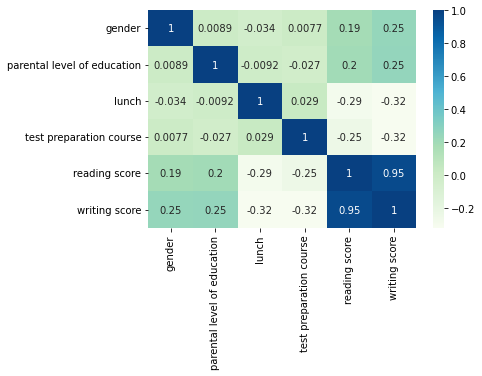

In [13]:
sns.heatmap(df.corr(), cmap="GnBu", annot = True)
plt.show()

Heatmap that displays the correlation between all values.

In [14]:
lunch_corr = abs(-0.29-0.32)/2
test_prep_corr = abs(-0.25-0.32)/2
parent_corr = abs(0.20+0.25)/2
gender_corr = abs(0.25+0.19)/2

print(lunch_corr)
print(test_prep_corr)
print(parent_corr)
print(gender_corr)

0.305
0.28500000000000003
0.225
0.22


Calculate and display average correlation values of lunch, test prep, parent ed, and gender.